# Proyecto Final
## Estudio sobre la depresion en los estudiantes
El presente proyecto aborda un problema dual de clasificación binaria y análisis de regresión relacionado con la salud mental de estudiantes, específicamente enfocado en la depresión.<br>
El objetivo principal es predecir si un estudiante presenta depresión (variable objetivo Depression con valores 0 y 1, donde 1 indica presencia de depresión) basándonos en diversos factores demográficos, académicos, de estilo de vida y psicosociales.

Importamos el dataset

In [2]:
import pandas as pd

df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### Analisis del Dataset
El dataset contiene 18 atributos que se pueden dividir de la siguiente manera:

#### Identificación:

id: Identificador único para cada estudiante (entero).

#### Variables Demográficas:

Gender: Género del estudiante (categórica: Male, Female).<br>
Age: Edad del estudiante en años (numérica, continua).<br>
City: Ciudad de residencia (categórica).<br>

#### Variables Académicas y Profesionales:

Profession: Ocupación del estudiante (categórica, principalmente "Student").<br>
Academic Pressure: Nivel de presión académica (numérica, escala del 0-5).<br>
Work Pressure: Nivel de presión laboral (numérica, escala del 0-5).<br>
CGPA: Promedio académico acumulado (numérica, continua).<br>
Study Satisfaction: Satisfacción con los estudios (numérica, escala del 1-5).<br>
Job Satisfaction: Satisfacción laboral (numérica, escala del 0-5).<br>
Degree: Grado académico que el estudiante está cursando (categórica).<br>
Work/Study Hours: Horas diarias dedicadas al trabajo/estudio (numérica, continua).<br>

#### Variables de Salud y Estilo de Vida:

Sleep Duration: Duración del sueño (categórica: "Less than 5 hours", "5-6 hours", "7-8 hours").<br>
Dietary Habits: Hábitos alimenticios (categórica: Healthy, Moderate, Unhealthy).<br>
Financial Stress: Nivel de estrés financiero (numérica, escala).<br>

#### Variables de Salud Mental:

Have you ever had suicidal thoughts?: Presencia de pensamientos suicidas (categórica binaria: Yes, No).<br>
Family History of Mental Illness: Antecedentes familiares de enfermedad mental (categórica binaria: Yes, No).

#### Variable Objetivo:

Depression: Presencia de depresión (categórica binaria codificada como 0 y 1, donde 1 indica presencia de depresión).


Valores nulos por columna:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

No hay valores nulos en el dataset de muestra.


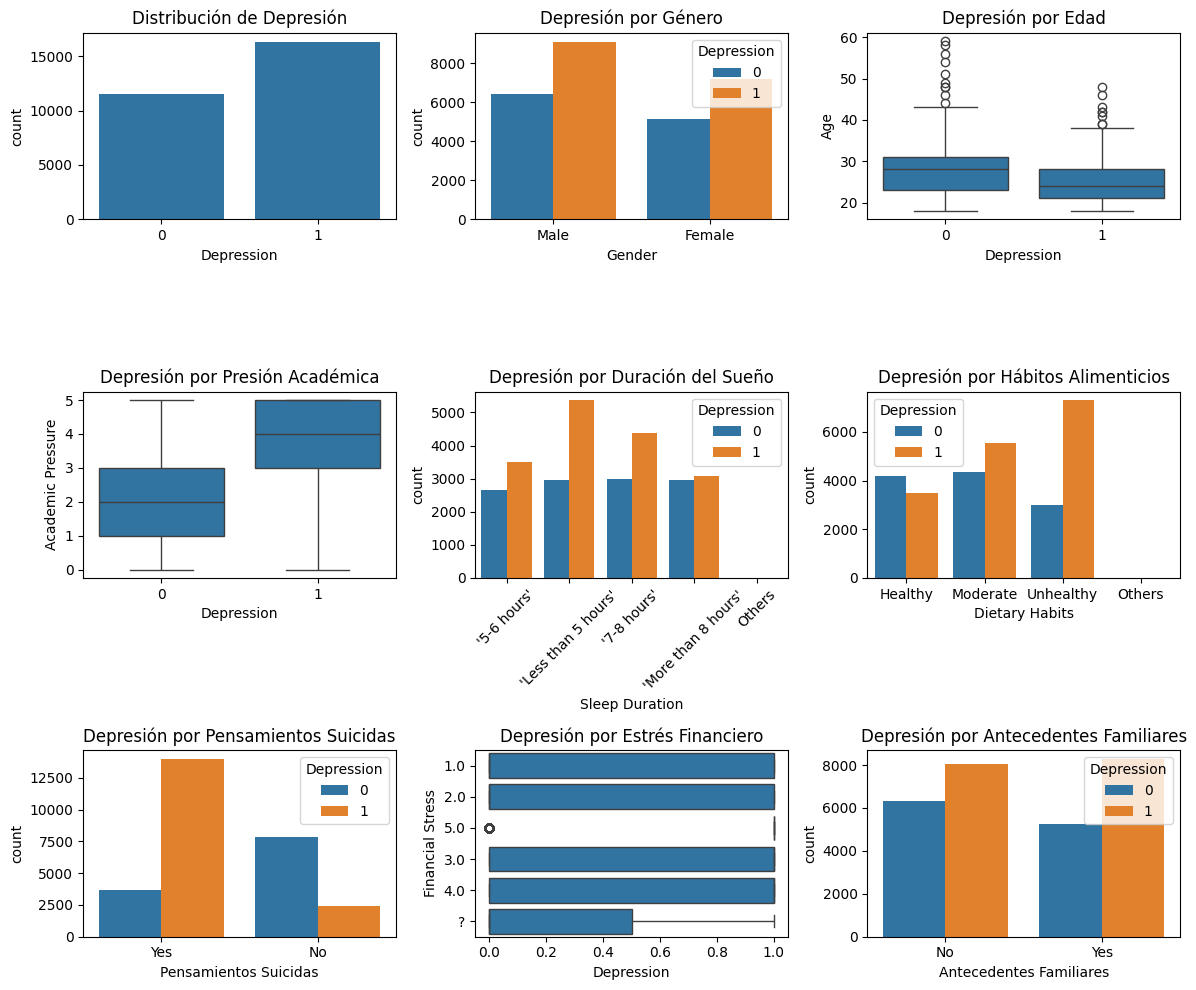

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- ANÁLISIS EXPLORATORIO DE DATOS (EDA) ----------
# ----- 1. ELIMINAR VALORES NULOS Y ATRIBUTOS NO NECESARIOS -----

# Verificamos valores nulos (para un dataset completo)
nulos_por_columna = df.isnull().sum()
print("\nValores nulos por columna:")
print(nulos_por_columna)

# Si hay valores nulos, decidimos cómo tratarlos
if nulos_por_columna.sum() > 0:
    print("\nTratamiento de valores nulos:")

    # Tratamiento de valores nulos para variables numéricas
    for columna in df.select_dtypes(include=['int64', 'float64']).columns:
        if df[columna].isnull().sum() > 0:
            # Imputamos la mediana para variables numéricas
            mediana = df[columna].median()
            df[columna].fillna(mediana, inplace=True)
            print(f"- Columna '{columna}': {df[columna].isnull().sum()} valores nulos imputados con la mediana ({mediana})")

    # Tratamiento de valores nulos para variables categóricas
    for columna in df.select_dtypes(include=['object']).columns:
        if df[columna].isnull().sum() > 0:
            # Imputamos la moda para variables categóricas
            moda = df[columna].mode()[0]
            df[columna].fillna(moda, inplace=True)
            print(f"- Columna '{columna}': {df[columna].isnull().sum()} valores nulos imputados con la moda ({moda})")
else:
    print("\nNo hay valores nulos en el dataset de muestra.")

# Eliminamos atributos no necesarios
# 'id' no es relevante para la predicción, lo eliminamos
df = df.drop(['id'], axis=1)


# Configuración para las visualizaciones
plt.figure(figsize=(12, 10))

# 1. Distribución de la variable objetivo
plt.subplot(3, 3, 1)
sns.countplot(x='Depression', data=df)
plt.title('Distribución de Depresión')

# 2. Relación entre género y depresión
plt.subplot(3, 3, 2)
sns.countplot(x='Gender', hue='Depression', data=df)
plt.title('Depresión por Género')

# 3. Relación entre edad y depresión
plt.subplot(3, 3, 3)
sns.boxplot(x='Depression', y='Age', data=df)
plt.title('Depresión por Edad')

# 4. Relación entre presión académica y depresión
plt.subplot(3, 3, 4)
sns.boxplot(x='Depression', y='Academic Pressure', data=df)
plt.title('Depresión por Presión Académica')

# 5. Relación entre duración del sueño y depresión
plt.subplot(3, 3, 5)
sns.countplot(x='Sleep Duration', hue='Depression', data=df)
plt.title('Depresión por Duración del Sueño')
plt.xticks(rotation=45)

# 6. Relación entre hábitos alimenticios y depresión
plt.subplot(3, 3, 6)
sns.countplot(x='Dietary Habits', hue='Depression', data=df)
plt.title('Depresión por Hábitos Alimenticios')

# 7. Relación entre pensamientos suicidas y depresión
plt.subplot(3, 3, 7)
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df)
plt.title('Depresión por Pensamientos Suicidas')
plt.xlabel('Pensamientos Suicidas')

# 8. Relación entre estrés financiero y depresión
plt.subplot(3, 3, 8)
sns.boxplot(x='Depression', y='Financial Stress', data=df)
plt.title('Depresión por Estrés Financiero')

# 9. Relación entre antecedentes familiares y depresión
plt.subplot(3, 3, 9)
sns.countplot(x='Family History of Mental Illness', hue='Depression', data=df)
plt.title('Depresión por Antecedentes Familiares')
plt.xlabel('Antecedentes Familiares')

plt.tight_layout()
plt.show()

A simple vista podemos ver que la gente que tiene pensamientos suicidas son mas propensas a la depresion, al igual que el tener habitos alimenticios poco saludables, dormir menos de 5 horas y ser hombre.

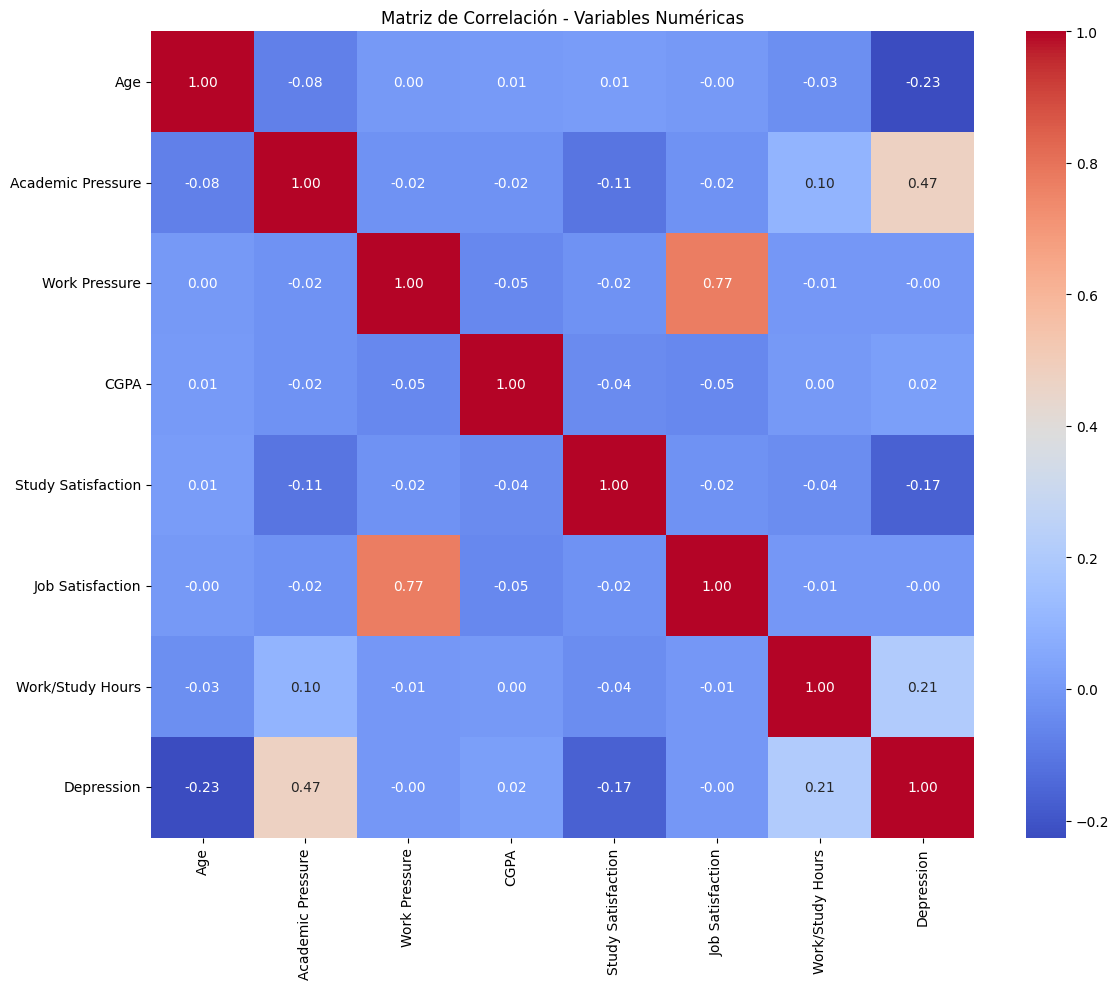

In [4]:
# Matriz de correlación para variables numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()


### Podemos identificar varias relaciones interesantes:

Presión de trabajo y satisfacción laboral: Existe una correlación positiva fuerte (0.77) entre la presión de trabajo y la satisfacción laboral, lo que sugiere que quienes experimentan mayor presión en el trabajo tienden a reportar mayor satisfacción laboral.

Presión académica y depresión: Hay una correlación positiva moderada (0.47) entre la presión académica y la depresión, indicando que mayores niveles de presión académica están asociados con mayores niveles de depresión.

Edad y depresión: Se observa una correlación negativa (-0.23) entre la edad y la depresión, sugiriendo que las personas de mayor edad tienden a reportar menos síntomas depresivos.

## Vamos a convertir los atributos categoricos en numericos y separacion

In [5]:

from sklearn.preprocessing import LabelEncoder

# Separamos las características y la variable objetivo
X = df.drop(['Depression'], axis=1)
y = df['Depression']
# Identificamos las columnas por tipo
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCaracterísticas categóricas:", categorical_features)
print("\nCaracterísticas numéricas:", numerical_features)

label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
X = df.drop(['Depression'], axis=1)
y = df['Depression']
df.head()




Características categóricas: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']

Características numéricas: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,51,12,5.0,0.0,8.97,2.0,0.0,0,0,4,1,3.0,0,0,1
1,0,24.0,5,12,2.0,0.0,5.90,5.0,0.0,0,1,11,0,3.0,1,1,0
2,1,31.0,44,12,3.0,0.0,7.03,5.0,0.0,2,0,6,0,9.0,0,1,0
3,0,28.0,49,12,3.0,0.0,5.59,2.0,0.0,1,1,8,1,4.0,4,1,1
4,0,25.0,18,12,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,0,0,0


# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos estandarización a las variables numéricas
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [6]:


from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score

# Dividimos los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos estandarización a las variables numéricas
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])




## Vamos a aplicar primer lugar un modelo de regresion logistica, SVM, KNN y una red neuronal

  Tiempo de entrenamiento: 96.26821 segundos
  Tiempo de predicción: 14.39499 segundos
  Tiempo total: 110.66320 segundos


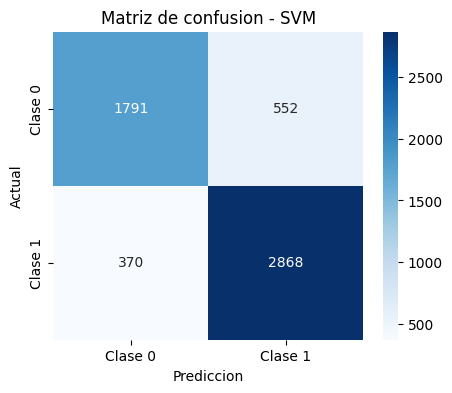

  Tiempo de entrenamiento: 0.00000 segundos
  Tiempo de predicción: 1.28164 segundos
  Tiempo total: 1.28164 segundos


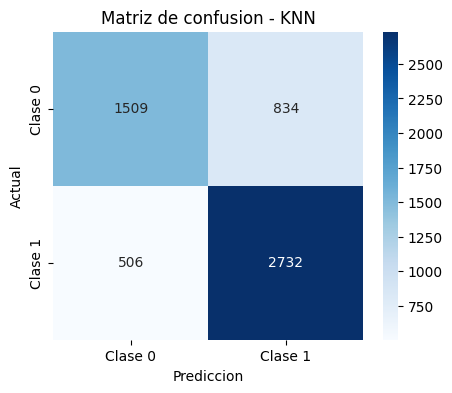

  Tiempo de entrenamiento: 0.14066 segundos
  Tiempo de predicción: 0.01563 segundos
  Tiempo total: 0.15630 segundos


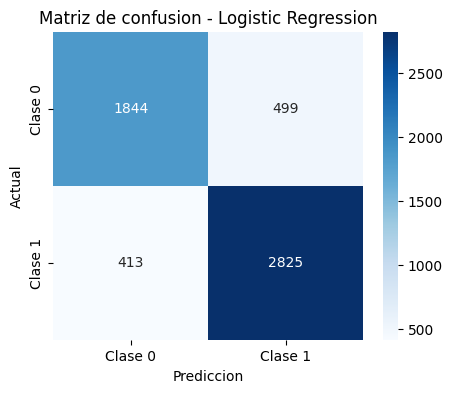

  Tiempo de entrenamiento: 2.53241 segundos
  Tiempo de predicción: 0.00000 segundos
  Tiempo total: 2.53241 segundos


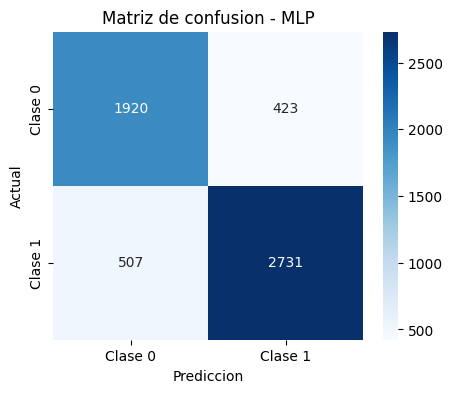

  Tiempo de entrenamiento: 2.78170 segundos
  Tiempo de predicción: 0.20319 segundos
  Tiempo total: 2.98489 segundos


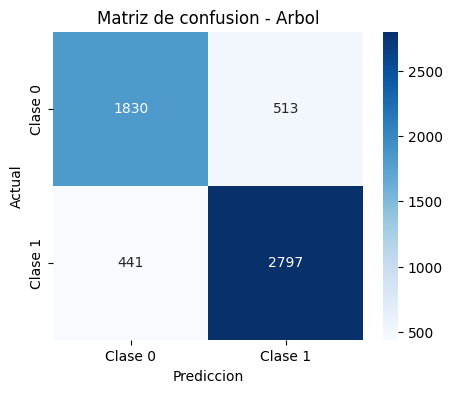

             SVM    KNN  Logistic Regression    MLP  Arbol
Accuracy   83.48  75.99                83.66  83.34  82.91
Precision  83.86  76.61                84.99  86.59  84.50
Recall     88.57  84.37                87.25  84.34  86.38
F1 Score   86.15  80.31                86.10  85.45  85.43
AUC-ROC    91.14  81.99                91.27  91.22  90.59


In [7]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import numpy as np
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score, f1_score, \
    roc_auc_score, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression




models = {

    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "MLP": MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', max_iter=800, random_state=42),
    "Arbol": RandomForestClassifier(n_estimators=100, random_state=42)
}
results = {}
training_times = {}
prediction_times = {}
total_times = {}
for name, model in models.items():
    start_train_time = time.time()
    model.fit(X_train, y_train)
    end_train_time = time.time()
    training_time = end_train_time - start_train_time
    training_times[name] = training_time
    start_pred_time = time.time()
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    end_pred_time = time.time()
    prediction_time = end_pred_time - start_pred_time
    prediction_times[name] = prediction_time
    total_time = training_time + prediction_time


    total_times[name] = total_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)


    results[name] = [ accuracy, precision, recall, f1, auc_roc]
    # Imprimimos tiempos
    print(f"  Tiempo de entrenamiento: {training_time:.5f} segundos")
    print(f"  Tiempo de predicción: {prediction_time:.5f} segundos")
    print(f"  Tiempo total: {total_time:.5f} segundos")
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)


    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
    plt.xlabel("Prediccion")
    plt.ylabel("Actual")
    plt.title(f"Matriz de confusion - {name}")
    plt.show()



df_results = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score", "AUC-ROC"])
df_percentage = df_results.round(4).mul(100)
print(df_percentage)



Si priorizas el recall (identificar correctamente los casos positivos), SVM es ligeramente mejor.<br>
Si priorizas la precisión (minimizar falsos positivos) o el AUC-ROC (rendimiento general en diferentes umbrales), la Regresión Logística es ligeramente superior.<br>
KNN no sería recomendable en este contexto, ya que su rendimiento es notablemente inferior en casi todos los aspectos, especialmente en precisión y AUC-ROC

### Visualizamos los tiempos


In [8]:
df_times = pd.DataFrame({
    'Entrenamiento': training_times,
    'Predicción': prediction_times,
    'Total': total_times
}).T

print("\nTiempos de ejecución (segundos):")
print(df_times.round(5))



Tiempos de ejecución (segundos):
                     SVM      KNN  Logistic Regression      MLP    Arbol
Entrenamiento   96.26821  0.00000              0.14066  2.53241  2.78170
Predicción      14.39499  1.28164              0.01563  0.00000  0.20319
Total          110.66320  1.28164              0.15630  2.53241  2.98489


El tiempo de ejecucion de SVM es demasiado largo, si bien tiene un rendimiento decente, lo descartaremos por el tiempo de ejecucion


In [9]:
# Eliminar el modelo SVM de df_times si existe
if 'SVM' in df_times.columns:
    df_times = df_times.drop(columns=['SVM'])
    # Eliminar KNN del diccionario de modelos
if 'SVM' in models:
    del models['SVM']

# Eliminar KNN de los resultados
if 'SVM' in results:
    del results['SVM']
if 'SVM' in df_results.columns:
    df_results = df_results.drop(columns=['SVM'])

## Comparamos resultados (eliminando ya a SVM como opcion)

<Figure size 1400x800 with 0 Axes>

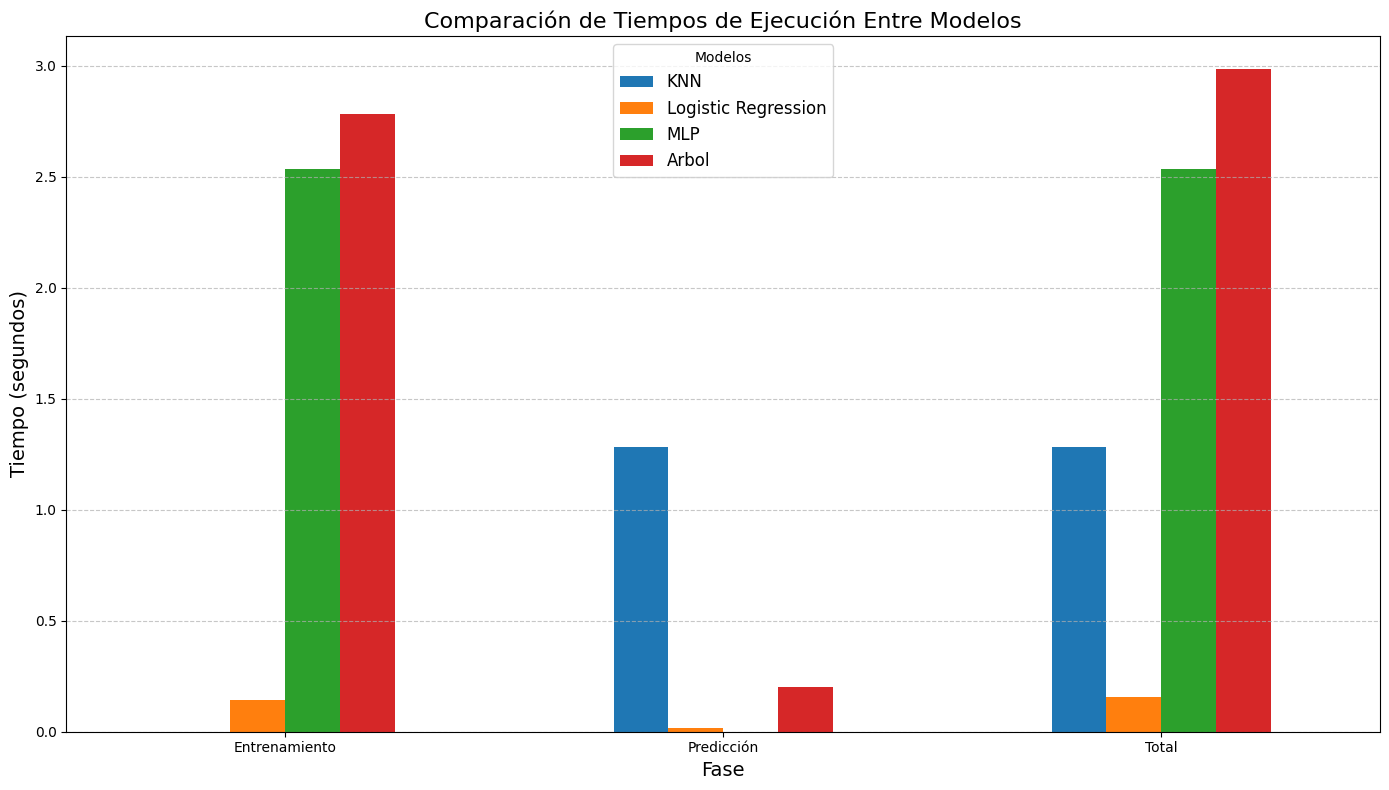

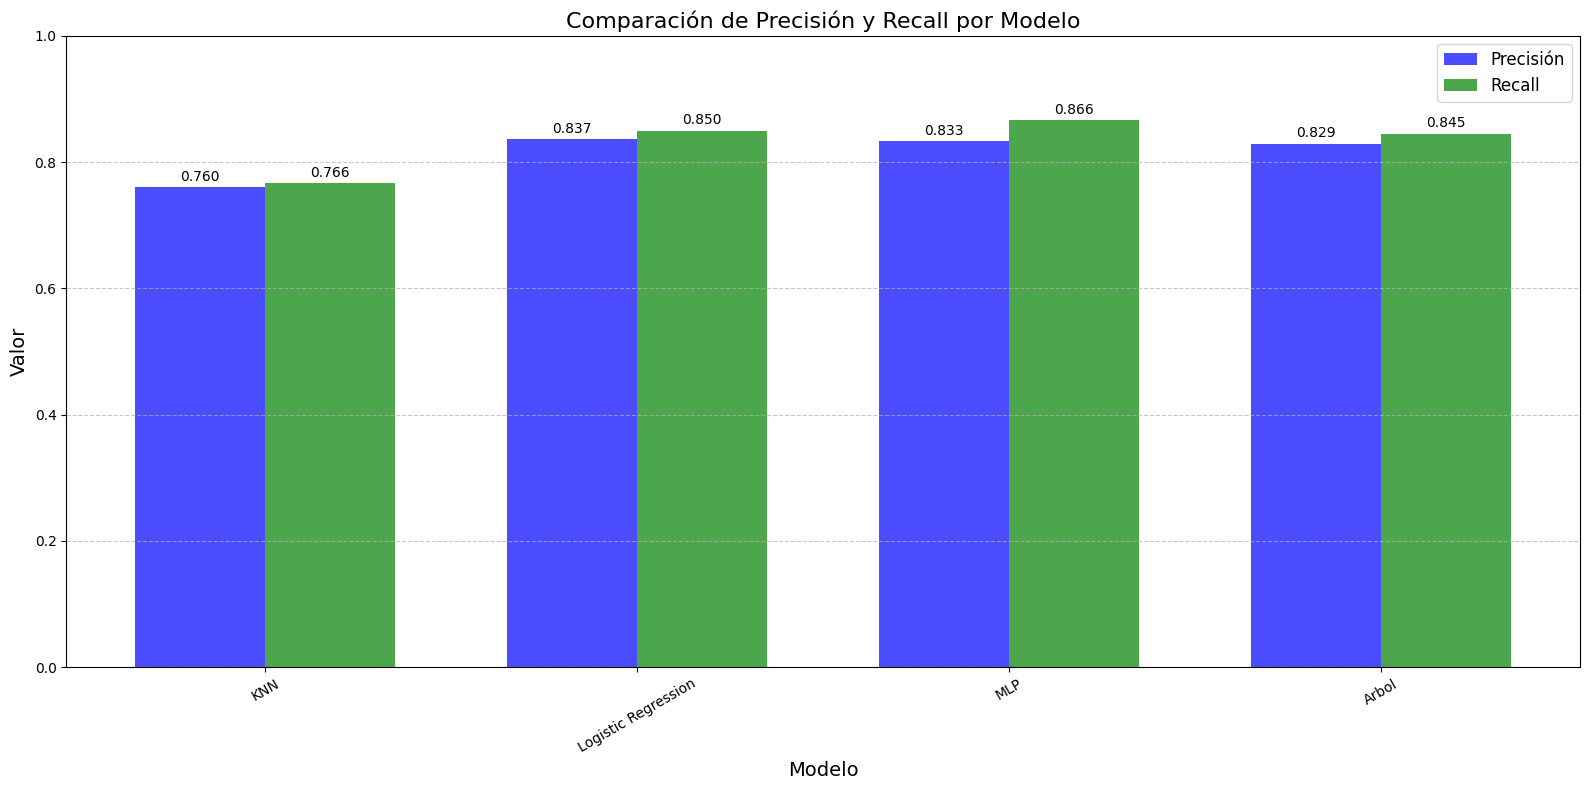

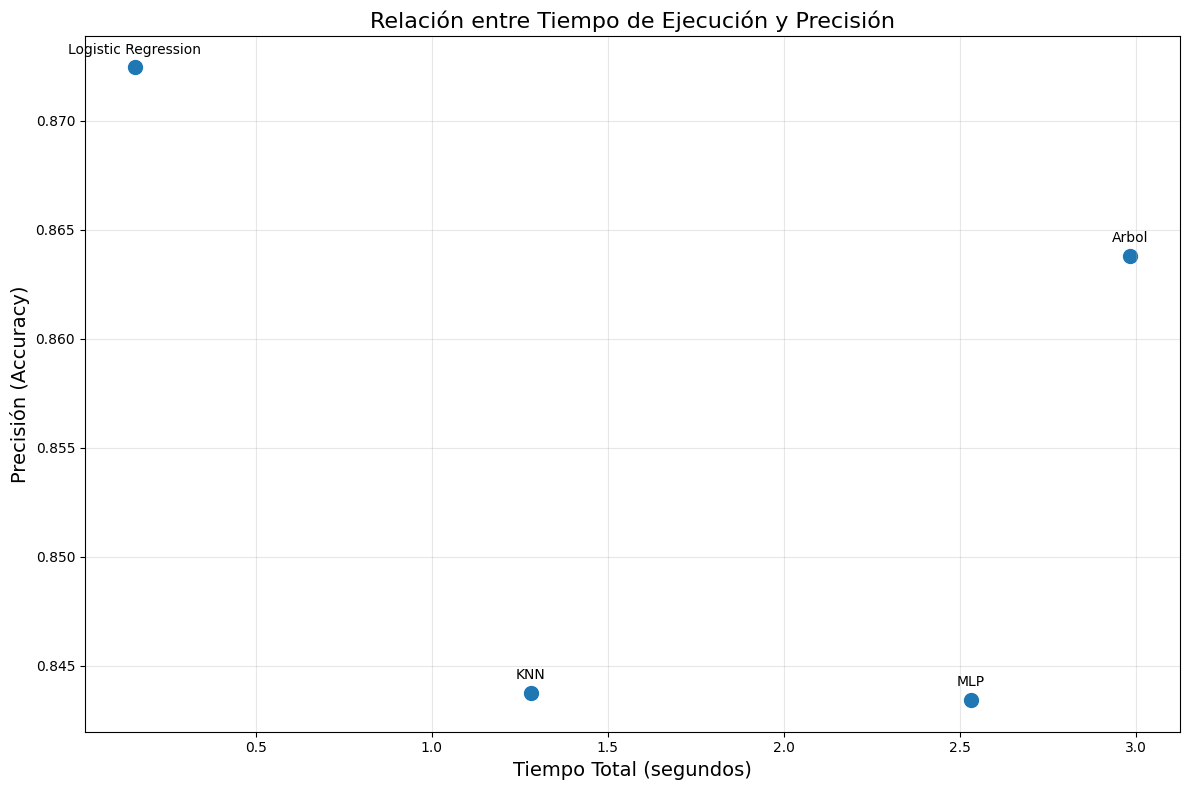

<Figure size 1000x1000 with 0 Axes>

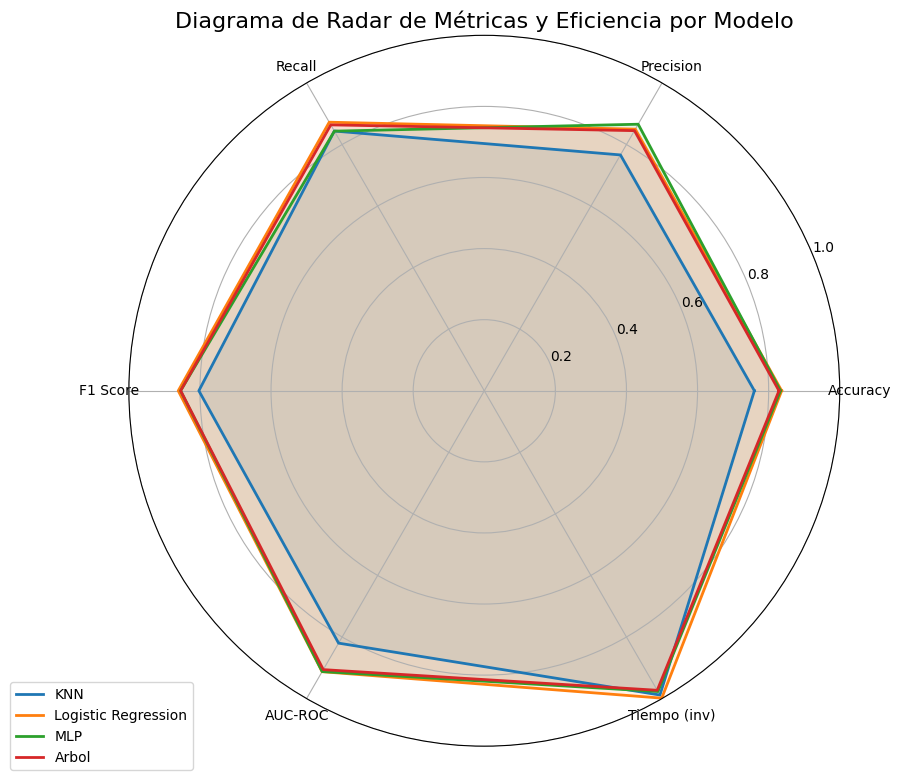

In [10]:
# Visualizamos la comparación de tiempos
plt.figure(figsize=(14, 8))
df_times.plot(kind='bar', figsize=(14, 8))
plt.title('Comparación de Tiempos de Ejecución Entre Modelos', fontsize=16)
plt.xlabel('Fase', fontsize=14)
plt.ylabel('Tiempo (segundos)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, title="Modelos")
plt.tight_layout()
plt.savefig('comparacion_tiempos_modelos.png')
plt.show()

# Diagrama de barras agrupadas para precisión y recall
plt.figure(figsize=(16, 8))

# Preparar datos
model_labels = []
precision_values = []
recall_values = []

for model in models.keys():
    if model in results:
        model_labels.append(model)
        precision_values.append(results[model][0])  # Precisión
        recall_values.append(results[model][1])     # Recall

# Configurar las barras
x = np.arange(len(model_labels))
width = 0.35

# Crear gráfico de barras agrupadas
plt.bar(x - width/2, precision_values, width, label='Precisión', color='blue', alpha=0.7)
plt.bar(x + width/2, recall_values, width, label='Recall', color='green', alpha=0.7)

# Añadir elementos visuales
plt.title('Comparación de Precisión y Recall por Modelo', fontsize=16)
plt.xlabel('Modelo', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.ylim(0, 1.0)
plt.xticks(x, model_labels, rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Añadir etiquetas de valores en las barras
for i, v in enumerate(precision_values):
    plt.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center', fontsize=10)
for i, v in enumerate(recall_values):
    plt.text(i + width/2, v + 0.01, f'{v:.3f}', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('comparacion_precision_recall_modelos.png')
plt.show()


# Gráfico comparativo entre tiempo total y precisión
plt.figure(figsize=(12, 8))
x_values = []
y_values = []

for model in models.keys():
    if model in results and model in total_times:
        x_values.append(total_times[model])
        y_values.append(results[model][2])

plt.scatter(x_values, y_values, s=100)

# Añadir etiquetas a cada punto
for i, model in enumerate(models.keys()):
    if model in results and model in total_times:
        plt.annotate(model,
                    (total_times[model], results[model][2]),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center')

plt.title('Relación entre Tiempo de Ejecución y Precisión', fontsize=16)
plt.xlabel('Tiempo Total (segundos)', fontsize=14)
plt.ylabel('Precisión (Accuracy)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico de radar combinando métricas y tiempo normalizado
metrics = df_results.index.tolist() + ['Tiempo (inv)']
model_names = df_results.columns

# Normalizar tiempos y convertirlos a un indicador inverso (menos tiempo = mejor)
max_time = max(total_times.values())
normalized_times = {model: 1 - (time/max_time) for model, time in total_times.items() if model in model_names}

plt.figure(figsize=(10, 10))
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Cerrar el polígono

# Preparar el gráfico
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

for model in model_names:
    if model in normalized_times:  # Verificar que el modelo exista en normalized_times
        values = df_results[model].tolist() + [normalized_times[model]]
        values += values[:1]  # Cerrar el polígono
        ax.plot(angles, values, linewidth=2, label=model)
        ax.fill(angles, values, alpha=0.1)

# Configurar etiquetas
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
ax.set_ylim(0, 1)
plt.title('Diagrama de Radar de Métricas y Eficiencia por Modelo', fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()

En este punto nos interesa mas centrarnos en la precision y el recall por lo que descartaremos el KNN y el Arbol, para centranos en los que tienen mayor recall y precision.


### Aplicaremos la validacion cruzada para quedarnos con el mejor modelo

In [11]:
if 'KNN' in models:
    del models['KNN']

if 'Arbol' in models:
    del models['Arbol']
if 'Arbol' in df_times.columns:
    df_times = df_times.drop(columns=['Arbol'])
if 'KNN' in df_times.columns:
    df_times = df_times.drop(columns=['KNN'])
    
from sklearn.model_selection import cross_validate
# Definir las métricas que queremos evaluar
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Diccionario para guardar los resultados
cv_results = {}

# Validación cruzada para cada modelo
for name, model in models.items():
    results = cross_validate(model, X, y, cv=5, scoring=scoring)
    cv_results[name] = {
        'Accuracy': results['test_accuracy'].mean(),
        'Precision': results['test_precision'].mean(),
        'Recall': results['test_recall'].mean(),
        'F1': results['test_f1'].mean()
    }

# Convertir los resultados a un DataFrame
df_cv_results = pd.DataFrame(cv_results).T  # Transpuesta para que los modelos sean filas
df_cv_results = df_cv_results.sort_values(by='Recall', ascending=False)  # Ordenar por recall

# Mostrar resultados
print("Resultados de validación cruzada:")
print(df_cv_results)

Resultados de validación cruzada:
                     Accuracy  Precision    Recall        F1
Logistic Regression  0.846350   0.856797  0.885651  0.870969
MLP                  0.845776   0.858053  0.882774  0.870186


In [12]:
print("\nTiempos de ejecución (segundos):")
print(df_times.round(5))


dif =df_times['MLP']/ df_times['Logistic Regression']


print(f"Regresion Logistica es {dif.Total} veces mas rapido que la Red Neuronal")



Tiempos de ejecución (segundos):
               Logistic Regression      MLP
Entrenamiento              0.14066  2.53241
Predicción                 0.01563  0.00000
Total                      0.15630  2.53241
Regresion Logistica es 16.202447979669323 veces mas rapido que la Red Neuronal


Tras la validacion cruzada, vemos que los resultados obtenidos en el primer entrenamiento no son casualidad, y ambos modelos ofrecen un rendimiento muy similar, sin embargo la diferencia en los tiempos de ejecucion es tan grande que finalmente, nos quedaremos con el modelo de Regresion Logistica.

### IA explicativa (SHAP)

La realidad de los valores {'Gender': 0.0, 'Age': 0.650332650568034, 'City': 19.0, 'Profession': 12.0, 'Academic Pressure': -0.8313322776281162, 'Work Pressure': -0.010931083607756636, 'CGPA': 0.5991842917556036, 'Study Satisfaction': 0.04308355915601104, 'Job Satisfaction': -0.017150983411956013, 'Sleep Duration': 3.0, 'Dietary Habits': 0.0, 'Degree': 1.0, 'Have you ever had suicidal thoughts ?': 0.0, 'Work/Study Hours': 0.7686682225787348, 'Financial Stress': 4.0, 'Family History of Mental Illness': 0.0} es 0 y la predicción es 0


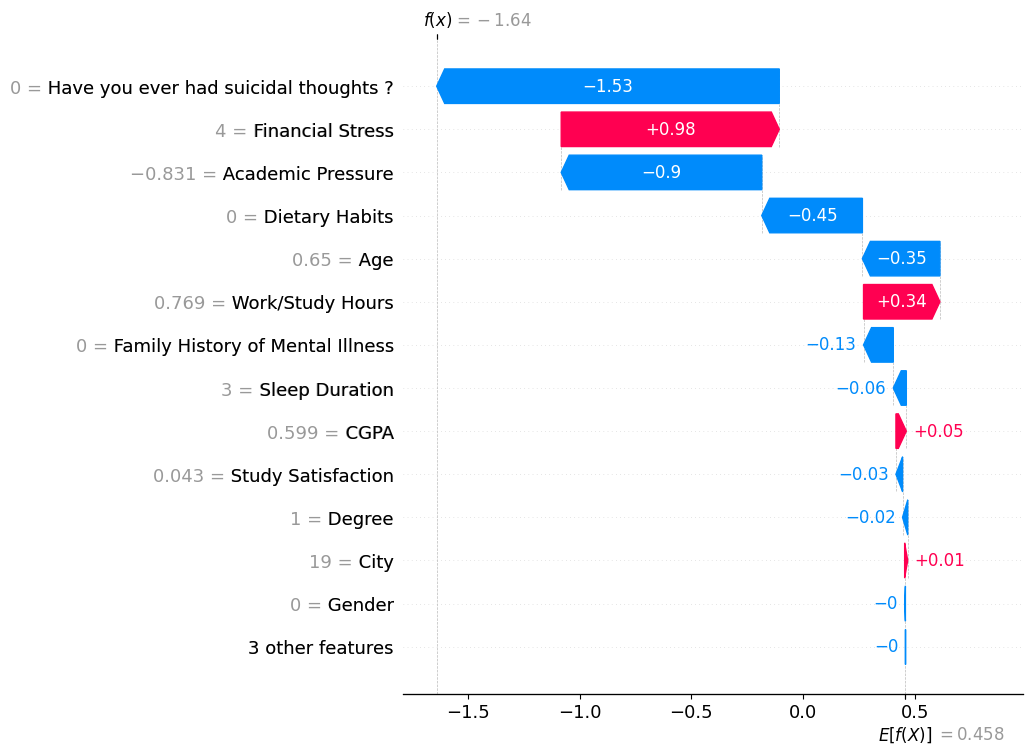

In [13]:

import shap
logistic_model = models['Logistic Regression']

explainerLOG = shap.LinearExplainer(logistic_model, X_train)
shap_valuesLOG = explainerLOG(X_test)

# Seleccionar una instancia específica para el waterfall
sample_ind = 0  
print(f"La realidad de los valores {X_test.iloc[sample_ind].to_dict()} es {y_test.iloc[sample_ind]} y la predicción es {logistic_model.predict(X_test.iloc[[sample_ind]])[0]}")
shap.plots.waterfall(shap_valuesLOG[sample_ind], max_display=14)



#### Factores de mayor impacto negativo (aumentan el riesgo de depresión):

1. Pensamientos suicidas (-1.53): Este es el factor con mayor impacto negativo, lo que indica una fuerte asociación entre haber tenido pensamientos suicidas y la depresión.
2. Presión académica (-0.9): El segundo factor más influyente negativamente, sugiriendo que la presión académica está significativamente relacionada con mayores niveles de depresión.
3. Hábitos alimenticios (-0.45): Muestra un impacto negativo moderado, indicando que ciertos hábitos alimenticios pueden contribuir a la depresión.
4. Edad (-0.35): Tiene un efecto negativo moderado, sugiriendo que ciertos grupos de edad pueden ser más susceptibles.

#### Factores de mayor impacto positivo (reducen el riesgo de depresión):

1. Estrés financiero (+0.98): Muestra un gran impacto positivo, lo que me sorprende. Esto podría indicar un resultado contraintuitivo o una particularidad de este caso específico.
2. Horas de trabajo/estudio (+0.34): Muestra un efecto protector moderado.

#### IMPORTANTE
Estos resultados corresponden a un caso individual y podrían no generalizar a toda la población estudiantil

#### Generamos un grafico con el resumen de todas las instancias

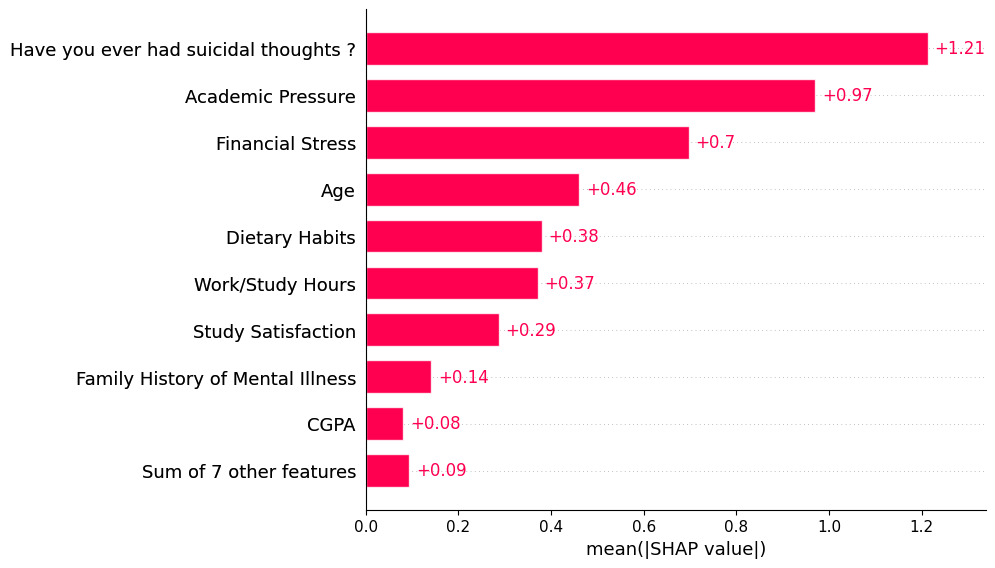

In [14]:
# Para obtener los valores SHAP de todo el conjunto de prueba
shap_values_all = explainerLOG(X_test)

# Gráfico de resumen para ver la importancia global de las características

shap.plots.bar(shap_values_all.abs.mean(0))




### Esto nos permite confirmar lo que vimos en el grafico waterfall anterior


Factores de mayor importancia (ordenados):
1. Pensamientos suicidas (+1.21): Destaca como el factor más influyente con una diferencia notable respecto al resto. Esto confirma una fuerte asociación entre los pensamientos suicidas y la depresión estudiantil.
2. Presión académica (+0.97): El segundo factor más importante, lo que subraya el impacto significativo que tiene el estrés académico en la salud mental de los estudiantes.
3. Estrés financiero (+0.70): Ocupa el tercer lugar, demostrando que las preocupaciones económicas tienen un peso considerable en la salud mental estudiantil.
4. Edad (+0.46): Tiene una influencia moderada, sugiriendo que ciertos grupos pueden presentar diferente vulnerabilidad a la depresión.
5. Hábitos alimenticios (+0.38): Confirma la importancia moderada de la nutrición en la salud mental.
6. Horas de trabajo/estudio (+0.37): Muestra un impacto similar a los hábitos alimenticios.
7. Satisfacción con el estudio (+0.29): Un factor con influencia notable aunque menor que los anteriores.

Factores de menor importancia:

1. Historial familiar de enfermedad mental (+0.14)
2. CGPA (promedio de calificaciones) (+0.08)
3. Suma de otras 7 características (+0.09): Conjunto de factores con impacto mínimo individual.

### IA explicativa (ALE)

In [15]:


from alibi.explainers import ALE


# Inicializar el explicador ALE
ale_explainer = ALE(predictor=logistic_model.predict_proba, 
                   feature_names=X_test.columns.tolist())

# Generar explicaciones ALE
ale_exp = ale_explainer.explain(X_test.values)

# Visualizar los resultados para las características más importantes
# Puedes especificar qué características quieres visualizar
features_to_plot = [0, 1, 2, 3, 4, 5]  # Índices de las características más importantes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, feature_idx in enumerate(features_to_plot):
    feature_name = X_test.columns[feature_idx]
    ale_values = ale_exp.ale_values[feature_idx]
    feature_values = ale_exp.feature_values[feature_idx]
    
    axes[idx].plot(feature_values, ale_values)
    axes[idx].set_title(f'ALE para {feature_name}')
    axes[idx].set_xlabel(feature_name)
    axes[idx].set_ylabel('Efecto en la predicción')
    axes[idx].axhline(y=0, color='r', linestyle='-')

plt.tight_layout()
plt.show()

# Para visualizar la importancia global según ALE
feature_importance_ale = np.zeros(len(X_test.columns))
for i in range(len(X_test.columns)):
    feature_importance_ale[i] = np.max(np.abs(ale_exp.ale_values[i]))

plt.figure(figsize=(10, 6))
plt.bar(X_test.columns, feature_importance_ale)
plt.xticks(rotation=90)
plt.title('Importancia de características según ALE')
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'torch._C'